# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [5]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

## 1. Handwritten digit recognition
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [6]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

In [6]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
#plt.imshow(X[300].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
#print("Class label:",y[300]) # Print the correct class label

### 1.1 Default k-Nearest Neighbor classifier
First we fit a k-Nearest Neighbor classifier on the entire data set, where we use the first 60,000 examples as the training set and the last 10,000 as the test set. 

KNN score: 0.968800


array([7, 2, 1, ..., 4, 5, 6])

array([7, 2, 1, ..., 4, 5, 6])

[  33  115  195  241  247  300  318  320  321  341  358  381  444  445  464
  479  495  542  551  565  582  583  628  646  659  691  707  740  791  839
  844  877  881  924  938  939  947  951  957 1014 1039 1062 1068 1082 1089
 1107 1112 1192 1202 1226 1242 1247 1260 1289 1299 1319 1325 1326 1364 1394
 1465 1466 1500 1522 1523 1530 1553 1559 1681 1709 1717 1718 1721 1737 1754
 1782 1790 1813 1823 1850 1855 1865 1878 1901 1955 1970 1984 2043 2044 2052
 2053 2063 2082 2093 2098 2109 2118 2129 2130 2135 2168 2177 2182 2189 2197
 2224 2237 2293 2298 2299 2325 2339 2371 2387 2393 2406 2422 2426 2437 2454
 2462 2488 2533 2582 2597 2607 2648 2654 2730 2758 2771 2810 2863 2896 2901
 2927 2939 2952 2953 3005 3060 3062 3073 3117 3160 3206 3225 3262 3269 3333
 3369 3384 3405 3456 3475 3503 3520 3558 3559 3597 3599 3629 3654 3662 3702
 3727 3751 3757 3767 3780 3796 3808 3811 3838 3853 3893 3902 3926 3941 3976
 4017 4027 4056 4065 4075 4078 4116 4140 4163 4176 4194 4199 4224 4289 4306
 4317 4330 4

Class label: 4
Prediction label: 0


Class label: 4
Prediction label: 9


Class label: 3
Prediction label: 1


Class label: 9
Prediction label: 8


Class label: 4
Prediction label: 6


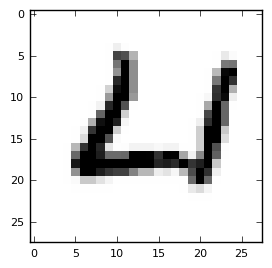

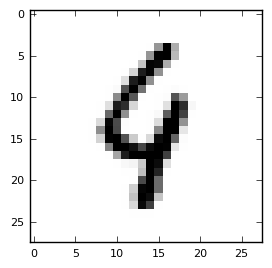

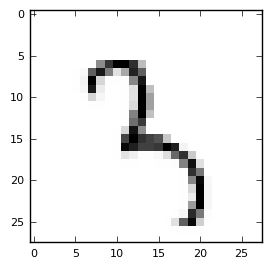

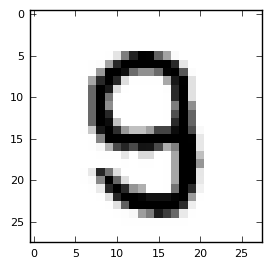

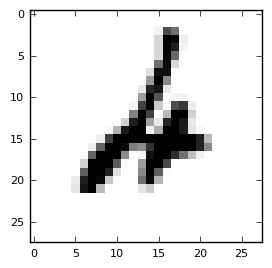

In [4]:
from sklearn import neighbors, linear_model

#split in test and train sets
split = 60000
X_train, X_test = np.split(X,[split])
y_train, y_test = np.split(y,[split])

#fit model and find predictive accuracy
knn = neighbors.KNeighborsClassifier()
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

# - find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify? 
# compare the two ndarrays of the predictors and the 
y_pred = knn.predict(X_test)
a = (y_test == y_pred)
misclassified = np.where(a == False)[0]

y_test
y_pred
print(misclassified)

#plot some of the misclassified digits: 
for i in range(0,5):
    j = misclassified[i]
    plt.figure(i)
    # here make sure the right element is visualized. 
    plt.imshow(X[split+j].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
    print("Class label:",y_test[j]) # Print the correct class label
    print("Prediction label:", y_pred[j])
    

The predictive accuracy of the default kNN is 0.968800. 

For most of the misclassifications, it can be easily seen why they are misclassified. For example, the first and last 4 displayed above would be hard to classify for humans as well; they look more like a characters than digits. However, a human would probably not have classified the first 4 as a 0, but it makes sense that the machine does because about 75% of the shape resembles a 0. The second 4, which is classified as a 9 would probably have been hard to classify by a human as well, because it looks much like a 9. The 3 and 9 however, are not necessarily hard to classify by humans. One can imagine that the 9 is mistaken for an 8, but a human would never even consider the 3 to be a 1.

### 1.2 Optimize the number of neighbors of kNN
Now we use a stratified subsample (10%) of the data set and optimize for the number of neighbors. We try to find the number of neighbors that gives the lowest misclassification rate (i.e. highest accuracy).

First we vary the number of neighbors, and we use a 10 fold cross validation to determine the misclassification rate. Then we do the same but with 100 bootstrapping repeats. We use a stratified shuffle split to implement bootstrapping. Remark that we do not split the sample into a test- and training data set, because we are only interested in the optimal parameter. If we were interested in the actual model, a test/training split would have been necessary to evaluate the performance of the final model.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=0)

knnk = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,50)}

from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(knnk, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_sample, y_sample)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.94
Best cross-validation error-score: 0.06


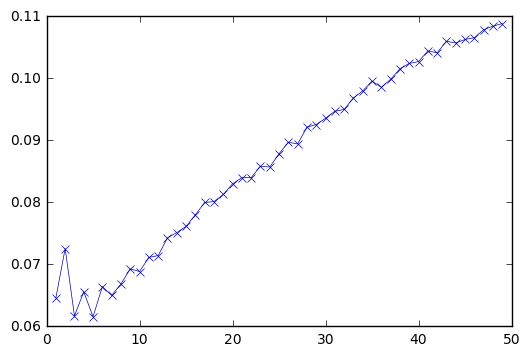

In [9]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best cross-validation error-score: {:.2f}".format(1-grid_search.best_score_))

import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
harry = pd.DataFrame(results, columns=['param_n_neighbors', 'mean_test_score'])
harry['error']=1-harry['mean_test_score']

x1 = pd.DataFrame(harry, columns=['param_n_neighbors'])
y1 = pd.DataFrame(harry, columns=['error'])

p = plt.plot(x1, y1, marker="x")

In [ ]:
#Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

test = 1/3
train = 2/3

resultsBoot = []

rangek = range(1,50)

for k in rangek:
    knnboot = KNeighborsClassifier(n_neighbors=k)
    shuffle_split = StratifiedShuffleSplit(test_size=test, train_size=train, n_splits=100)
    scores = cross_val_score(knnboot, X_sample, y_sample, cv=shuffle_split, n_jobs=-1)
    #print("Cross-validation scores:\n{}".format(scores))
    resultsBoot.append(1-scores.mean())

Best parameters: 1
Best bootstrapping error score 0.07


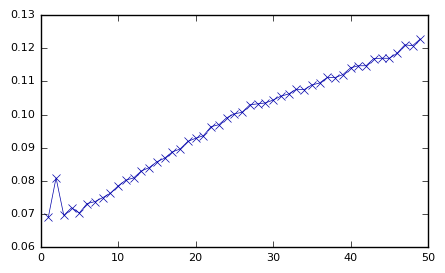

In [10]:
import numpy as np
print("Best parameters: {}".format(rangek[np.argmin(resultsBoot)]))
print("Best bootstrapping error score {:.2f}".format(min(resultsBoot)))

p = plt.plot(rangek, resultsBoot, marker="x")

We find that both cross validation and bootstrapping give similar results; the error rate increases in a similar fashion. The best parameter using cross-validation turns out to be k = 5 with a corresponding error rate of 0.06. Using bootstrapping yields k=1, with an error rate of 0.07. An interesting observation is the increase in error rate for even values of k. This probably has to do with the fact that there can be many ties if an even number of neighbors is considered.

### 1.3 Optimize regularization of LR and SVM
We now compare the accuracy of the kNN model against linear classification models: logistic regression and linear support vector machine. First we calculate the accuracy of these models with default parameter settings on the same dataset as the default kNN.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#split in test and train sets
X_train, X_test = np.split(X,[60000])
y_train, y_test = np.split(y,[60000])

#build default LogisticRegression model
logreg = LogisticRegression().fit(X_train, y_train) 
print("Training set score Logistic Regression: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score Logistic Regression: {:.3f}".format(logreg.score(X_test, y_test)))

#build default Support Vector Machine
linear_svm = LinearSVC().fit(X_train, y_train)
print("Training set score Linear SVM: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Test set score linear SVM: {:.3f}".format(linear_svm.score(X_test, y_test)))

Training set score Logistic Regression: 0.932
Test set score Logistic Regression: 0.918
Training set score Linear SVM: 0.873
Test set score linear SVM: 0.868


Recall that the accuracy of the default kNN was equal to 0.969. The accuracy of the default LR is 0.918 and of the linear SVM 0.868. It can be concluded that the default LR and linear SVM perform worse than the default kNN.

Now we optimize both the Logistic Regression model and linear Support Vector Machine for the degree of regularization (C) and choice of penalty (L1/L2). Because of computational limitations, we build the models using the stratified sample we used before for cross validation of the kNN.

In [ ]:
#create train and test data
from sklearn.model_selection import train_test_split
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV 

#define parameter grid
param_grid = {'C': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

#grid_search logistic regression
grid_search_log = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid_search_log.fit(X_sample, y_sample)
results_log = pd.DataFrame(grid_search_log.cv_results_)

#grid_search support vector machine
grid_search_svm = GridSearchCV(LinearSVC(dual=False), param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_sample, y_sample)
results_svm = pd.DataFrame(grid_search_svm.cv_results_)

Best parameters LR: {'penalty': 'l1', 'C': 0.005}
Best cross-validation score LR: 0.89
Best cross-validation error-score LR: 0.11


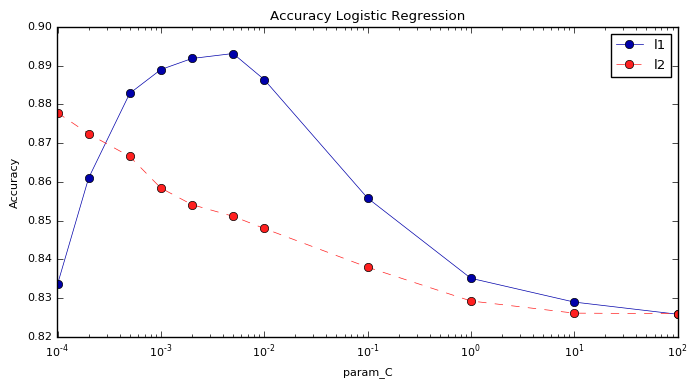

In [7]:
print("Best parameters LR: {}".format(grid_search_log.best_params_))
print("Best cross-validation score LR: {:.2f}".format(grid_search_log.best_score_))
print("Best cross-validation error-score LR: {:.2f}".format(1-grid_search_log.best_score_))

#plot the LR results 
import matplotlib.pyplot as plt
df = pd.DataFrame(results_log, columns=['mean_test_score', 'param_C', 'param_penalty'])
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
ax.set_xlabel('C')
for label, df in df.groupby('param_penalty'):
    df.plot(x = 'param_C', y ='mean_test_score', ax=ax, label=label, marker ="o", title="Accuracy Logistic Regression")
plt.legend()

Best parameters SVM: {'penalty': 'l1', 'C': 0.0005}
Best cross-validation score SVM: 0.89
Best cross-validation error-score SVM: 0.11


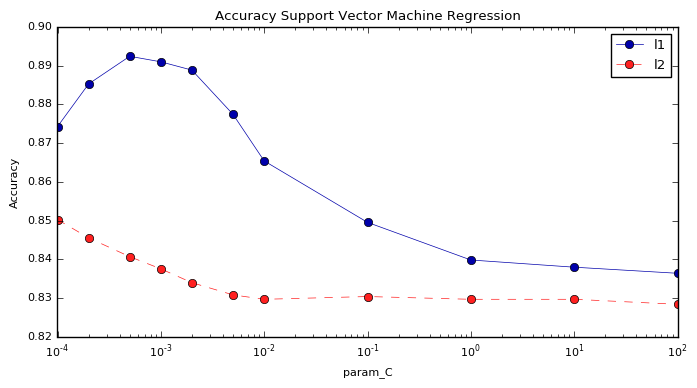

In [11]:
print("Best parameters SVM: {}".format(grid_search_svm.best_params_))
print("Best cross-validation score SVM: {:.2f}".format(grid_search_svm.best_score_))
print("Best cross-validation error-score SVM: {:.2f}".format(1-grid_search_svm.best_score_))

#plot the results 
import matplotlib.pyplot as plt
dfsvm = pd.DataFrame(results_svm, columns=['mean_test_score', 'param_C', 'param_penalty'])
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
ax.set_xlabel('C')
for label, dfsvm in dfsvm.groupby('param_penalty'):
    dfsvm.plot(x = 'param_C', y ='mean_test_score', ax=ax, label=label, 
               marker ="o", title="Accuracy Support Vector Machine Regression")
plt.legend()

Remark that we have used 5-fold cross validation for LR and SVM, whereas we used 10-fold cross validation for the kNN. We see that the optimal parameters for LR are penalty = l1 and C = 0.005, and for SVM penalty = l1 and C = 0.0005. This leads to an error score of 0.11 for both models. This is worse than the kNN, which had an error score of 0.07. So it can be concluded that we cannot get better than kNN.

We see that the behavior of L1 and L2 is similar for both models. 

L1 regularization prefers many coefficients to be exactly zero and some very large. Accuracy using L1 regularization increases as C increases, but then decreases again. This can be explained by the fact that very low values of C (much regularization) result in underfitting models with a high bias. This is the case because if there is much regularization, there will only be very few features with a non-negative coefficient which cannot model the complexity of the data. On the other hand, high values of C (less regularization) result in overfitting models with high variance. The optimal value lies somewhere in between.

L2 regularization prefers many small weights. This results in the most accurate models for very small values of C, and performance gradually decreases as C increases. We do not observe the underfitting behavior we see with L1 regularization because features are not as easily rejected from the model as with L1 regularization.

## 2. Model selection
We study how RandomForest hyperparameters interact on the Ionosphere dataset.

### 2.1 Optimize AUC using nested cross validation
We use a 5-fold cross validated grid search with a grid with a log scale for $n\_estimators$, from 1 to 256. We vary $max\_features$ between 1 and 34.

In [17]:
ionosphere = oml.datasets.get_dataset(59) # Download Ionosphere data
Xiono, yiono = ionosphere.get_data(target=ionosphere.default_target_attribute); # Get the predictors X and the labels y

In [18]:
import numpy as np

nrFeatures = Xiono.shape[1] #34 features in this dataset. 

n_est = np.logspace(0, 8, 9, base=2).astype(int)
param_grid= {'max_features': range(1,35), #add ,2 to do steps of two
              'n_estimators': n_est}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128, 256]), 'max_features': range(1, 35)}


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(test_size=.25, train_size=.75, n_splits=1)
scores = cross_val_score(GridSearchCV(RandomForestClassifier(), param_grid, scoring='roc_auc', cv=shuffle_split, n_jobs=-1),
                         Xiono, yiono, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores:  [ 0.979  0.964  0.915  0.996  0.965]
Mean cross-validation score:  0.963986324786


We find that the mean optimal AUC score is 0.964.

### 2.2 Visualization of AUC with varying hyper paremeters
We again vary the number of estimators and maximum number of features, but now we do not use a nested cross validation. The resulting AUC scores are plotted in a heat map.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring="roc_auc", n_jobs=-1)
Xiono_train, Xiono_test, yiono_train, yiono_test = train_test_split(
        Xiono, yiono, random_state=0)

grid.fit(Xiono_train, yiono_train)

print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128, 256]), 'max_features': range(1, 35)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)


Grid-Search with AUC
Best parameters: {'n_estimators': 32, 'max_features': 7}
Best cross-validation score (AUC): 0.962


In [20]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid.cv_results_)

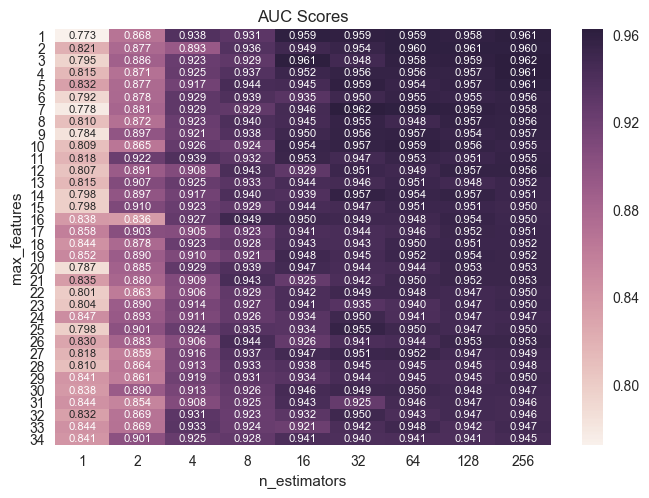

In [21]:
import seaborn as sns
#adjust the shape based on the grid size! 
scores = np.array(results.mean_test_score).reshape(len(param_grid['max_features']),len(param_grid['n_estimators']))
sns.set()

sns.heatmap(scores, annot=True, annot_kws={"size": 8}, fmt="0.3f", 
            xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_features'], 
           )
sns.plt.title('AUC Scores')
sns.plt.xlabel('n_estimators')
sns.plt.ylabel('max_features')

We see that the best parameters are $n\_estimators$ = 32 and $max\_features$ = 7. This gives an AUC of 0.962 (which is roughly the same as we saw in our nested cross validation). In general, the performance of the random forest increases as the number of estimators increases. This is especially true between 1 and 16 estimators; after this the performance seems to converge and only slightly increase (or even decrease). The maximum number of features does not show a very distinct pattern. The number of estimators seems to be a more important parameter than the maximum amount of features.

## 3. Decision tree heuristics (1 point)
In this exc. we consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

First we implement functions to calculate entropy and information gain and find the class entropy for the entire dataset and the information gain when splitting the data using the *water* feature. Ater that we implement/train our own decision tree, and train a scikit learn decision tree on the same data. In the end we compare the two results. 

### 3.1 Implement functions entropy and information gain.
We calculate the class entropy for the entire dataset and the information gain when splitting the data using the *Water* feature. 

In [188]:
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering
df # print

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


In [189]:
# pos and neg are the number of examples of the 
# pos and neg class respectively. 
def entropy(pos, neg):
    rpos = pos / (pos+neg)
    rneg = neg / (pos+neg)
    
    # ignore zero probabilities
    result = 0
    if (rpos>0):
        result = result - rpos*np.log2(rpos)
    if (rneg>0):
        result = result - rneg*np.log2(rneg)
    return result

# each attribute has two values e.g.:
# sky is SUNNY or RAINY 
# airtemp is WARM or COLD... etc. 
#pos1 number of examples having att value 1 and date = 1
#neg1 number of examples having att value 1 and date = 0
#pos2 number of examples having att value 2 and date = 1
#neg2 number of examples having att value 2 and date = 0
#compute this for each attribute.

def info_gain(pos1,neg1,pos2,neg2):
    Xi = pos1+neg1+pos2+neg2
    Xiv1 = pos1+neg1
    Xiv2 = pos2+neg2
    EX = entropy((pos1+pos2),(neg1+neg2))
    EXiv1 = entropy(pos1, neg1)
    EXiv2 = entropy(pos2, neg2)
    return EX - Xiv1/Xi*EXiv1 - Xiv2/Xi*EXiv2

#What is the class entropy for the entire dataset?
unique, counts = np.unique(df['Date?'], return_counts=True)
# counts contains [nr positives, nr negatives]

pos = counts[0]
neg = counts[1]

print("Class entropy for entire dataset is: ", entropy(pos, neg))

#What is the information gain 
#when you split the data using the Water feature?
water = df[['Water', 'Date?']]

#1 = warm
#2 = cool
pos1 = len(water[(water['Water']=='warm')&(water['Date?']=='yes')])
neg1 = len(water[(water['Water']=='warm')&(water['Date?']=='no')])
pos2 = len(water[(water['Water']=='cool')&(water['Date?']=='yes')])
neg2 = len(water[(water['Water']=='cool')&(water['Date?']=='no')])

print("Information gain when splitting on water features:", info_gain(pos1, neg1, pos2, neg2))

Class entropy for entire dataset is:  0.970950594455
Information gain when splitting on water features: 0.321928094887


We find that the class entropy for the entire dataset is equal to 0.97 and the information gain when splitting on water is 0.32. 

Now we use the entropy function to build a decision tree.

### 3.2 Implementation of basic decision tree



In [190]:
def init_attribute_list(df):
    #create initial attribute list
    atts = list(df)
    atts = atts[0:len(atts)-1]
    return atts

def build_tree(df):
    #find split
    spliton = find_best_gain(atts)
    #returns attribute index, attribute and the gain value
    branches = np.unique(df[spliton[1]])
    print("Split on: ", spliton[1])
    print("branches: ", branches[0], "and", branches[1])
    
    #split dataframe based on selected attribute
    #if only one value present for this att skip
    if (len(np.unique(df[spliton[1]]))>1):
        newdf = split_df(df, spliton[1])
        #display(newdf[0])
        #display(newdf[1])
        # remove the attribute on which has been splitted from the list
        del atts[spliton[0]] 
        
        #recurse on both branches IF NEEDED
        left = newdf[0]
        right = newdf[1]
        print("left branch:", "Entropy = ", find_entropy(left))
        if (len(np.unique(left['Date?']))>1):
            if (len(left.index)>1):
                display(left)
                print("This branch is not pure, continue building tree on this one \n")
                build_tree(left)
        else: 
            display(left)
            print("Found pure branch, no further recursion needed \n")
            dflist.append(left)
        
        print("right branch", "Entropy = ", find_entropy(right))
        if (len(np.unique(right['Date?']))>1):
            if (len(right.index)>1):
                display(right)
                print("This branch is not pure, continue building tree on this one \n")
                build_tree(right) 
        else:
            display(right) 
            print("Found pure branch, no further recursion needed \n")
            dflist.append(right)
    
#takes list of attributes to split on
def find_best_gain(atts):
    scores = []
    for i in atts:
        val = np.unique(df[i])
        pos1 = len(df[(df[i]==val[0])&(df['Date?']=='yes')])
        neg1 = len(df[(df[i]==val[0])&(df['Date?']=='no')])
        pos2 = len(df[(df[i]==val[1])&(df['Date?']=='yes')])
        neg2 = len(df[(df[i]==val[1])&(df['Date?']=='no')])
        scores.append(info_gain(pos1,neg1,pos2,neg2))
    
    splitatt = atts[np.argmax(scores)]
    return np.argmax(scores), splitatt, np.max(scores)

def split_df(df, att):
    val = np.unique(df[att])
    newdf = (df[(df[att]==val[0])],df[(df[att]==val[1])])
    return newdf

def find_entropy(df):
    pos = len(df[(df['Date?']=='yes')])
    neg = len(df[(df['Date?']=='no')])
    return (entropy(pos,neg))
    
    
dflist = []
atts = init_attribute_list(df)
build_tree(df)

print("Final leaves:")
for i in range(0,len(dflist)):
    display(dflist[i])
    

Split on:  Sky
branches:  rainy and sunny
left branch: Entropy =  0.0


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
2,rainy,warm,high,strong,cool,change,no


Found pure branch, no further recursion needed 

right branch Entropy =  0.811278124459


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


This branch is not pure, continue building tree on this one 

Split on:  Wind
branches:  strong and weak
left branch: Entropy =  0.0


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
3,sunny,cold,high,strong,warm,change,yes


Found pure branch, no further recursion needed 

right branch Entropy =  0.0


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
4,sunny,warm,normal,weak,warm,same,no


Found pure branch, no further recursion needed 

Final leaves:


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
2,rainy,warm,high,strong,cool,change,no


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
3,sunny,cold,high,strong,warm,change,yes


,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
4,sunny,warm,normal,weak,warm,same,no


### 3.3 Comparison with simple scikit decision tree


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

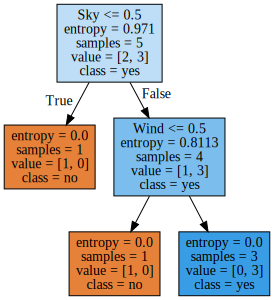

In [5]:
#now train a simple decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

#convert data to numerical first
df = pd.DataFrame({"Sky":[1,1,0,1,1],
                    "AirTemp":[1,1,1,0,1],
                   "Humidity":[0,1,1,1,0],
                   "Wind":[1,1,1,1,0],
                   "Water":[1,1,0,1,1],
                   "Forecast":[0,0,1,1,0],
                   "Date?":[1,1,0,1,0]
                   });
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering
#df # print

attrs = list(df)
X_train= df[attrs[0:5]]
#print(X_train)
Y_train = df[attrs[6]]
#print(Y_train)
tree = DecisionTreeClassifier(criterion="entropy", random_state=1)
tree.fit(X_train,Y_train)

# Creates a .dot file
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["no", "yes"], 
                feature_names=attrs[0:5], impurity=True, filled=True)
# Open and display
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

We find the same results as we did with our own implementation when selecting random_state=1. Note however, that changing the random_state of the scikit decision tree, might result in a split on a different variable. Our implementation always chooses the leftmost variable when there is a tie on the information gain metric: appearently there is some randomness in this selection when two variables have equal information gain in the scikit tree. Note however that the tree structure and entropies of the nodes does not change. 

Also it is important to mention that we have selected the information gain criteria in the scikit tree by setting the criterion to 'entropy'. If we would have left this out, we might have obtained different results with the scikit version. 

## 4. Random Forests
We study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

### 4.1 Out-Of-Bag error
First we train a RandomForest classifier with an increasing number of trees and report the Out-Of-Bag error.

In [43]:
eeg = oml.datasets.get_dataset(1471) # Download EEG-eye data
X, y = eeg.get_data(target=eeg.default_target_attribute);

#number of trees logarithmic scale
n_trees = np.logspace(0, 8, 9, base=2).astype(int)

oob_trees = []

from sklearn import ensemble

for t in n_trees:
    clf = ensemble.RandomForestClassifier(n_estimators=t, oob_score=True, n_jobs=-1)
    clf.fit(X,y)
    oob_trees.append(1-clf.oob_score_)    

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

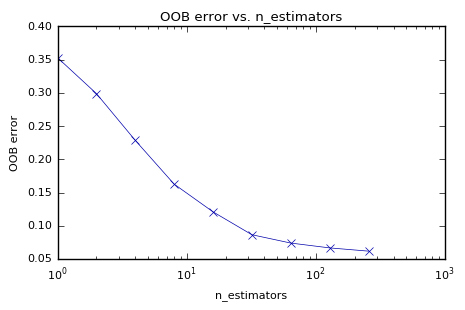

In [44]:
p = plt.plot(n_trees, oob_trees, marker="x")
plt.ylabel('OOB error')
plt.xlabel('n_estimators')
plt.title('OOB error vs. n_estimators')
plt.xscale('log')

### 4.2 Error rate using cross validation
Now we do the same, but we use 10 fold cross validation to determine the error rate.

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.model_selection import KFold

eeg = oml.datasets.get_dataset(1471) # Download EEG-eye data
X, y = eeg.get_data(target=eeg.default_target_attribute);

#number of trees logarithmic scale
n_trees = np.logspace(0, 8, 9, base=2).astype(int)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

cv_scores = []

for tr in n_trees:
    clfr = ensemble.RandomForestClassifier(n_estimators=tr, n_jobs = -1)
    scores = cross_val_score(clfr, X, y, cv = kfold)
    error = 1 - scores.mean()
    cv_scores.append(error)

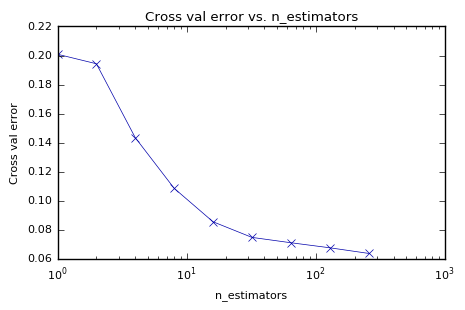

In [42]:
p = plt.plot(n_trees, cv_scores, marker="x")
plt.ylabel('Cross val error')
plt.xlabel('n_estimators')
plt.title('Cross val error vs. n_estimators')
plt.xscale('log')

When we compare the out-of-bar error and cross validation score, we observe that both measures show a very similar pattern. This is expected, because more trees generally result in a more generalizable model which scores better on a test set. The out-of-bag error seems to be more pessimistic than the cross validation error, but as the number of estimators increases the scoring measures become more similar. 

### 4.3 AUC, bias and variance of a Random Forest versus a decision tree
We now compare the performance of a RandomForest with that of a single decision tree, with respect to the AUC, bias and variance. First we implement bias and variance measurements. We compute the AUC, bias and variance of a single decision tree. Then we compute the same measures for several Random Forests with different number of trees.

** note: we have compared our implemenation of the bias/variance with the posted solution after it had been posted on February 22. Our implementation obtains the same results (when runned with equal random_states)**

In [7]:
eeg = oml.datasets.get_dataset(1471) # Download EEG-eye data
X, y = eeg.get_data(target=eeg.default_target_attribute);

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#each row represents 1 instance from the dataset, first column is the true label and others are predictions
def create_table_and_get_AUC(classifier, X, y, n_splits):
    totalTable = []
    AUClist = []
    for i in range(0,y.shape[0]): #add true labels to totalTable; for each point a list (with one value)
        totalTable.append([y[i]]) 
    splits = ShuffleSplit(test_size=1/3, train_size=2/3, n_splits=n_splits, random_state=0)
    
    for train_index, test_index in splits.split(X,y): #for each split, train a model and append predictions
        clf = classifier.fit(X[train_index], y[train_index])
        #find AUC score
        probas = clf.predict_proba(X[test_index])
        posprobas = probas[:,1]
        AUC = roc_auc_score(y[test_index], posprobas)
        AUClist.append(AUC)
        #find predicted values and append to totalTable
        prediction = clf.predict(X[test_index])
        x = 0
        for i in test_index:
            totalTable[i].append(prediction[x])
            x = x+1
    return [AUClist, totalTable]

# bias for any point x = misclassification ratio
def get_bias_and_variance(n_splits, totalTable):
    wsbiases = []
    wvariances = []
    for i in range(0,len(totalTable)):
        list_i = totalTable[i] #find list with predictions of point i
        sum_pred = sum(list_i[1:len(list_i)]) #sum all predictions (i.e. sum all 1's)
        pclass_1 = sum_pred/(len(list_i) - 1) #get percentage in class 1
        pclass_0 = 1 - pclass_1 #get percentage in class 0
        #find bias of point i
        if list_i[0] == 1: #if true label is 1, misclassification is the percentage with class 0
            bias = pclass_0
        else:
            bias = pclass_1
        #find variance of point i
        variance = (1 - (pclass_0**2 + pclass_1**2))/2
        #find weight of point i
        weight = (len(list_i)-1)/n_splits #calculate the number of times the point was predicted (from max amount of times)
        #weight variance and bias and append to list
        weighted_squared_bias = bias**2 * weight
        weighted_variance = variance * weight
        wsbiases.append(weighted_squared_bias)
        wvariances.append(weighted_variance)
    total_bias = sum(wsbiases) #return total bias
    total_variance = sum(wvariances) #return total variance
    return [total_bias, total_variance]

def get_auc_bias_variance(classifier, X, y, n_splits):
    #get AUC and totalTable
    auc, totalTable = create_table_and_get_AUC(classifier, X, y, n_splits) 
    mean_auc = np.mean(auc) #get mean AUC of bootstraps
    #get bias and variance
    bias, variance = get_bias_and_variance(n_splits, totalTable)
    return mean_auc, bias, variance

In [9]:
from sklearn.tree import DecisionTreeClassifier

mean_auc, bias, variance = get_auc_bias_variance(DecisionTreeClassifier(), X,y, 100)
print("Results for DecisionTreeClassifier: \nmean auc: {:.3f}".format(mean_auc), 
      "\nbias squared: {:.3f}".format(bias), "\nvariance: {:.3f}".format(variance), "\n total error: {:.3f}".format(bias+variance))

Results for DecisionTreeClassifier: 
mean auc: 0.824 
bias squared: 331.677 
variance: 537.573 
 total error: 869.250


In [10]:
auc_vector = []
bias_vector = []
variance_vector = []

from sklearn.ensemble import RandomForestClassifier  
import matplotlib.pyplot as plt

n_trees = np.logspace(0, 8, 9, base=2).astype(int)
rf = RandomForestClassifier(random_state=0, n_jobs = -1)

for t in n_trees:
    rf.set_params(n_estimators=t)
    auc, bias, variance = get_auc_bias_variance(rf, X, y, 100)
    auc_vector.append(auc)
    bias_vector.append(bias)
    variance_vector.append(variance)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

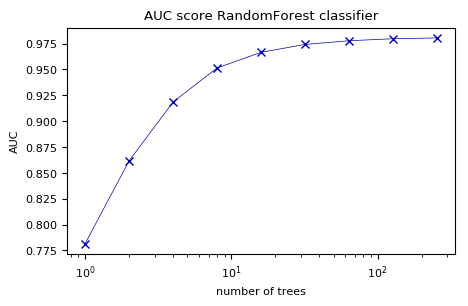

In [11]:
plt.xscale('log')
plt.xlabel('number of trees')
plt.ylabel('AUC')
plt.plot(n_trees, auc_vector, marker='x')
plt.title('AUC score RandomForest classifier')

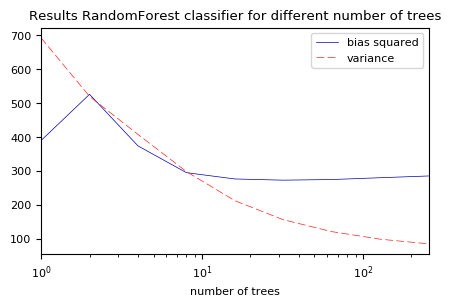

In [16]:
df = pd.DataFrame()
df['number of trees'] = n_trees
df['bias squared'] = bias_vector
df['variance'] = variance_vector
df.plot(x = 'number of trees', logx=True, title="Results RandomForest classifier for different number of trees")

The AUC of a single full decision tree is 0.824, the bias squared 332 and the variance 538. When we look at the ensemble, we see that the behavior of the Decision Tree are similar to a Random Forest with a small number of estimators: a relatively small bias and a relatively large variance. The number of trees definitely affects the amount of bias/variance. The variance decreases as the number of trees increases. This makes sense because a higher number of trees means that we can 'cancel out' more variance of the individual trees. The bias, on the other hand, seems to behave a bit weird at $n\_trees$ = 2, but overall it seems to decrease first and then slightly increase again as the number of trees increases. This is expected because a lower variance can result in a (slightly) underfitted model, which increases the bias.

## A regression benchmark (1 point)
For this exercise we consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

**Selection of algorithms**

We decided to pick the RandomForestRegressor, the LinearSVM and the LogisticRegression regressors

**Parameter values** 

For the RandomForestRegressor we decided to do use a log scale for the n_estimators parameter, and vary the max_features from 1 to 5 (since there are only 5 features in this dataset. 

For the LinearSVC and the LogisticRegression we used slightly adapted the parameter grids from the first exercise. After an exploratory run it turned out that we did not need as fine grained values for C as we used in exc. 1, but we did decide to add another (larger) option (C = 1000). For the penalty term we inspected l1 and l2 for both algorithms. 

**Evaluation **

For all models we first construct an RMSE heatmap to see the different RMSE scores for different parameter values. Subsequently we store the best parameters and RMSE scores (the cross validation and test) for an overall visual comparison at the end. 

In [18]:
# FIRST: RANDOMFORESTREGRESSOR
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute) 

#use 'neg_mean_squared_error'
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

features = X.shape[1] #5 features in this dataset. 
n_est = np.logspace(0, 8, 9, base=2).astype(int)
param_grid= {'max_features': range(1,features+1),
              'n_estimators': n_est}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1 )
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
grid_search.fit(X_train, y_train)

print("Results RandomForestRegressor")
print("Test set RMSE: {:.2f}".format(sqrt(-1*grid_search.score(X_test, y_test))))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation RMSE:", sqrt(-grid_search.best_score_))
forest = ['RandomForest', grid_search.best_params_, sqrt(-grid_search.best_score_), sqrt(-1*grid_search.score(X_test, y_test))]

Parameter grid:
{'max_features': range(1, 6), 'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128, 256])}


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': range(1, 6), 'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128, 256])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Results RandomForestRegressor
Test set RMSE: 3.20
Best parameters: {'max_features': 2, 'n_estimators': 16}
Best cross-validation RMSE: 3.06441019765568


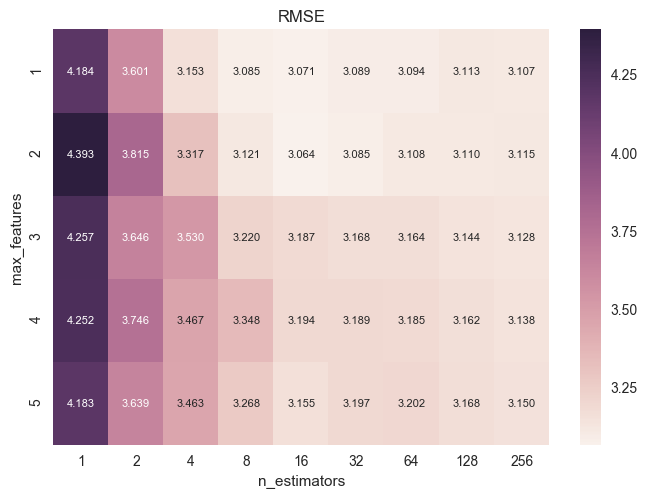

In [19]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

import seaborn as sns
#heatmap 
#adjust the shape based on the grid size! 
scores = np.array(results.mean_test_score).reshape(len(param_grid['max_features']),len(param_grid['n_estimators']))
scores = np.sqrt(-scores)
sns.set()

sns.heatmap(scores, annot=True, annot_kws={"size": 8}, fmt="0.3f", 
            xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_features'], 
           )
sns.plt.title('RMSE')
sns.plt.xlabel('n_estimators')
sns.plt.ylabel('max_features')

In [9]:
# SECOND: LINEARSVC
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute) 

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

#use paramgrid from exc1
param_grid= {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}
print("Parameter grid:\n{}".format(param_grid))

#shuffle beforehand.
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

grid_search = GridSearchCV(LinearSVC(dual=False), param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
grid_search.fit(X_train, y_train)

print("Results LinearSVC")
print("Test set RMSE {:.2f}".format(sqrt(-1*grid_search.score(X_test, y_test))))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation RMSE:", sqrt(-grid_search.best_score_))
svc = ['LinearSVC', grid_search.best_params_, sqrt(-grid_search.best_score_), sqrt(-1*grid_search.score(X_test, y_test))]

Parameter grid:
{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Results LinearSVC
Test set RMSE 3.99
Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation RMSE: 4.218820879393092


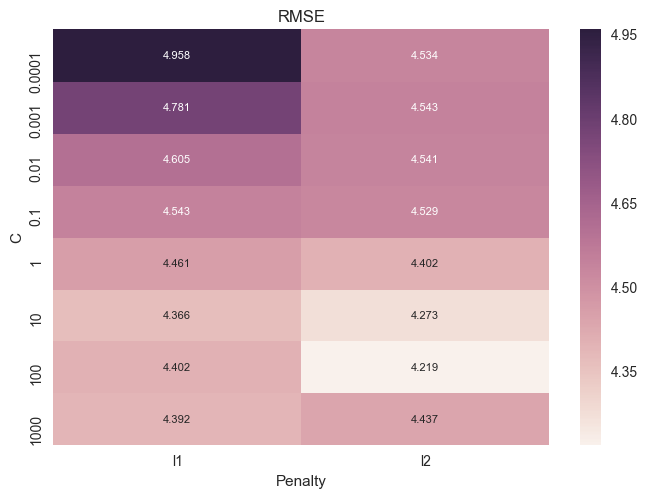

In [10]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

import seaborn as sns
#heatmap 
#adjust the shape based on the grid size! 
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']),len(param_grid['penalty']))
scores = np.sqrt(-scores)
sns.set()

sns.heatmap(scores, annot=True, annot_kws={"size": 8}, fmt="0.3f", 
            xticklabels=param_grid['penalty'], yticklabels=param_grid['C'], 
           )
sns.plt.title('RMSE')
sns.plt.xlabel('Penalty')
sns.plt.ylabel('C')

In [11]:
# THIRD: LOGISTIC REGRESSION
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute) 

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#use paramgrid from exc1
param_grid= {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}
print("Parameter grid:\n{}".format(param_grid))

#shuffle beforehand.
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1 )
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
grid_search.fit(X_train, y_train)

print("Results LogisticRegression")
print("Test set RMSE: {:.2f}".format(sqrt(-1*grid_search.score(X_test, y_test))))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation RMSE:", sqrt(-grid_search.best_score_))
logist = ['LogisticRegression', grid_search.best_params_, sqrt(-grid_search.best_score_), sqrt(-1*grid_search.score(X_test, y_test))]

Parameter grid:
{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Results LogisticRegression
Test set RMSE: 3.81
Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation RMSE: 4.227539831066742


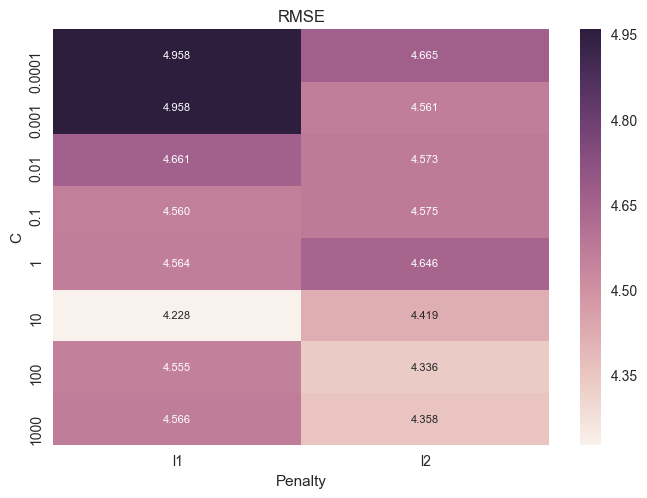

In [12]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

import seaborn as sns
#heatmap 
#adjust the shape based on the grid size! 
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']),len(param_grid['penalty']))
scores = np.sqrt(-scores)
sns.set()

sns.heatmap(scores, annot=True, annot_kws={"size": 8}, fmt="0.3f", 
            xticklabels=param_grid['penalty'], yticklabels=param_grid['C'], 
           )
sns.plt.title('RMSE')
sns.plt.xlabel('Penalty')
sns.plt.ylabel('C')

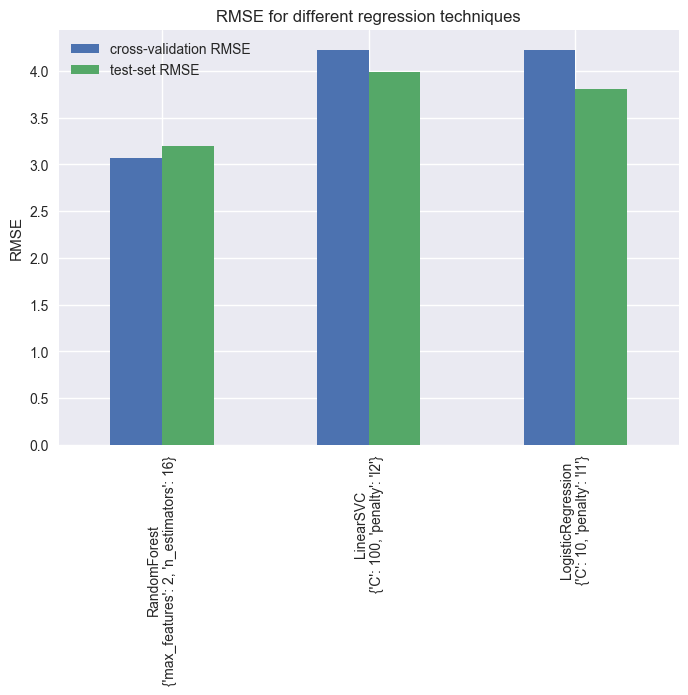

In [20]:
#Summary Results: 
total = [forest, svc, logist]
xrf = 'RandomForest\n'+ str(forest[1])
xsvc = 'LinearSVC\n'+str(svc[1])
xlogist = 'LogisticRegression\n'+str(logist[1])
index = [xrf, xsvc, xlogist]
columns = ['Algo', 'parameters', 'cross-validation RMSE','test-set RMSE']
df = pd.DataFrame(total, index, columns)

toplot = df.iloc[:, [2, 3]]
p = toplot.plot(kind='bar', title="RMSE for different regression techniques")
p.set_ylabel('RMSE')

We find that the RandomForestRegressor, using the parameters n_estimators = 16 and max_featurs = 2 yields the best results. The LinearSVC and the LogisticRegression both obtain a worse RMSE score. 